<a href="https://colab.research.google.com/github/Karanjot-Saini/Health-Insurance/blob/main/Medical_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics



In [ ]:
medical_charges_url='https://raw.githubusercontent.com/Karanjot-Saini/Health-Insurance/main/insurance.csv'


In [ ]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url,'insurance.csv')

('insurance.csv', <http.client.HTTPMessage at 0x78b8d7272080>)

In [ ]:
df=pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.shape

(1338, 7)

**Categorical Features**
. Sex
.Smoker
.Region


In [ ]:
#check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

In [ ]:
#
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-10-8c5827358a00>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])


Text(0.5, 1.0, 'Age Distribution')

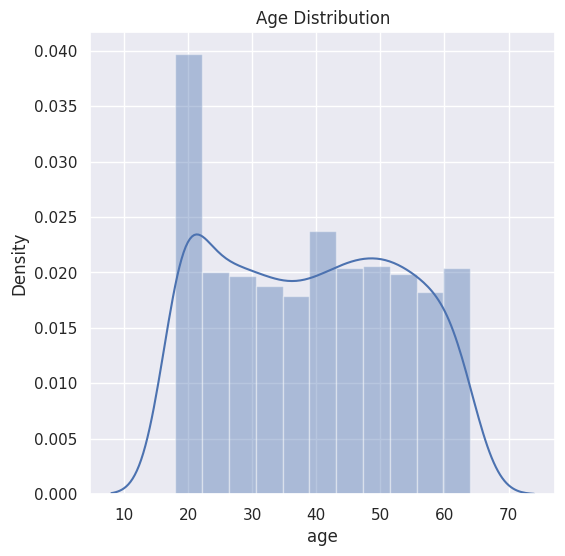

In [ ]:
# Distribution for age
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')

<ipython-input-11-94c6bc40b743>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex',data=df,palette='Set2')


Text(0.5, 1.0, 'Sex Distribution')

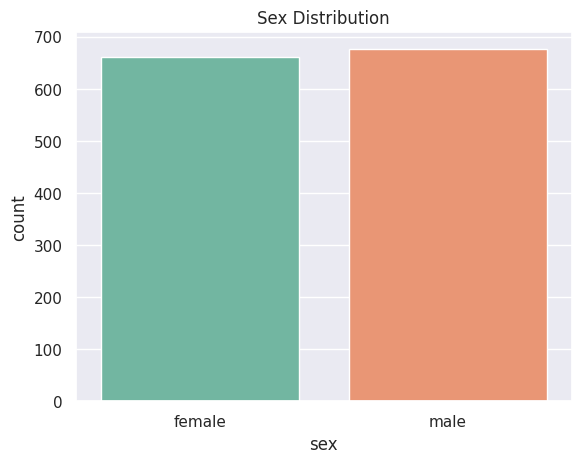

In [ ]:
# Distribution for categorical data
sns.countplot(x='sex',data=df,palette='Set2')
plt.title('Sex Distribution')

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

Normal bmi range ---> 18.5 to 24.9

<ipython-input-13-d15ff8b77102>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['bmi'])


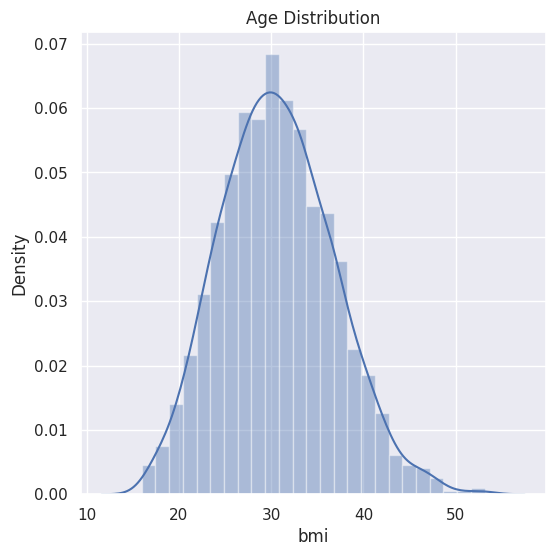

In [ ]:
#bmi distribution
plt.figure(figsize=(6,6))
sns.distplot(df['bmi'])
plt.title('Age Distribution')
plt.show()


<ipython-input-14-97dc141ed0fd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='children',data=df,palette='Set2')


Text(0.5, 1.0, 'Children')

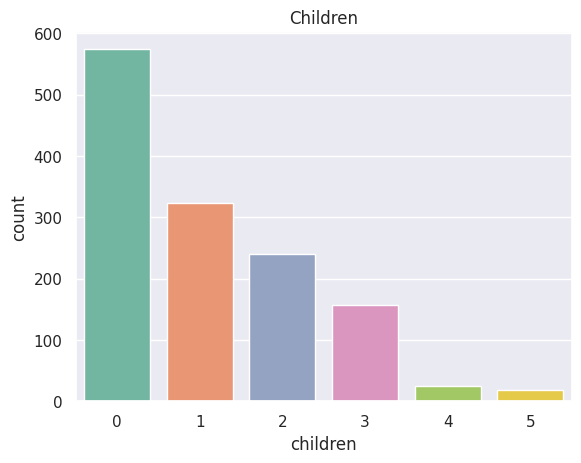

In [ ]:
sns.countplot(x='children',data=df,palette='Set2')
plt.title('Children')

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

<Axes: xlabel='smoker', ylabel='count'>

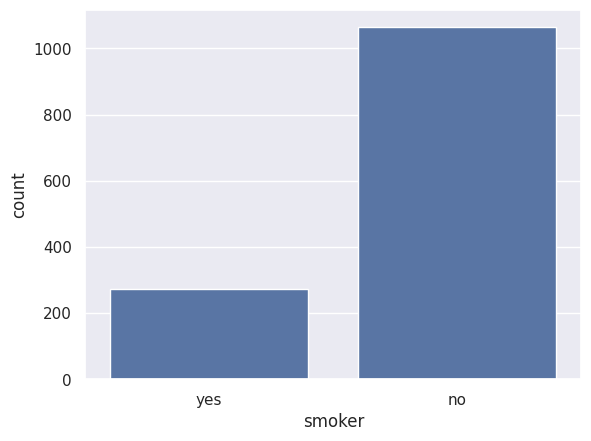

In [ ]:
sns.countplot(x='smoker',data=df)

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

<ipython-input-18-a6299a76b813>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region',data=df,palette='Set2')


<Axes: xlabel='region', ylabel='count'>

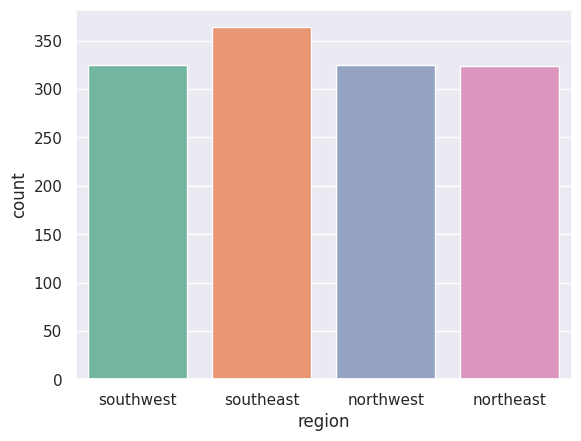

In [ ]:
sns.countplot(x='region',data=df,palette='Set2')

<ipython-input-19-df93ac4f6bde>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['charges'])


Text(0.5, 1.0, 'Charge Distribution')

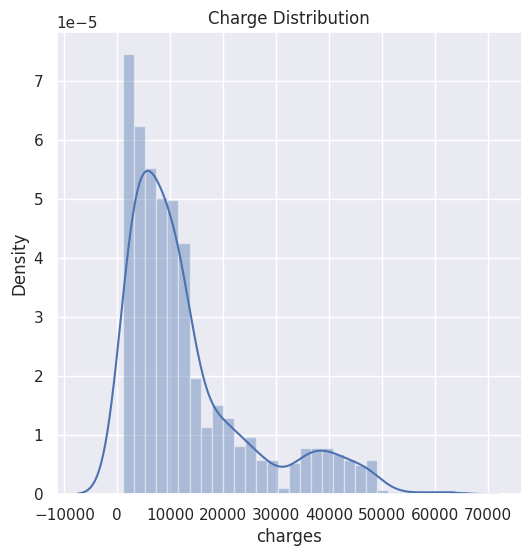

In [ ]:
# Distribution of charges value
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charge Distribution')

<Axes: xlabel='age', ylabel='charges'>

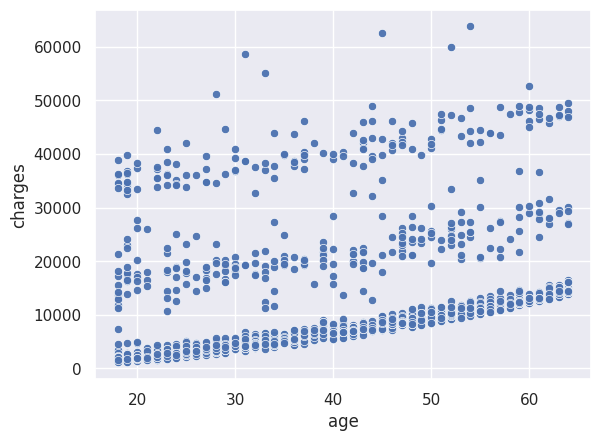

In [ ]:
sns.scatterplot(data=df,x='age',y='charges',alpha=0.95)

In [ ]:
# Encoding of categorical features

df.replace({'sex':{'male':0,'female':1}},inplace=True)

#Encoding smoker column
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#Encoding region column
df.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)


Spliting the features and Target

In [ ]:
X=df.drop(columns='charges',axis=1)
Y=df['charges']

In [ ]:
X.head()

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3


In [ ]:
Y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

Splitting the data into training data and testing data

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
print(X_train.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_test.shape)

(1070, 6)
(1070,)
(268,)
(268, 6)


Model Trainig Model

In [ ]:
# Loading  the linear regression model
regressor=LinearRegression()

In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

Model Evaluation

In [ ]:
training_data_predication=regressor.predict(X_train)

In [ ]:
# R squared value
r2_train=metrics.r2_score(Y_train,training_data_predication)
r2_train

0.751505643411174

Build a predicating system

In [ ]:
input_data=(31,1,25.74,0,1,0)

In [ ]:
input_data_numpy=np.asarray(input_data)

In [ ]:
input_data_reshaped=input_data_numpy.reshape(1,-1)


In [ ]:
predication=regressor.predict(input_data_reshaped)
print(predication)

[3760.0805765]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
